## Data Dive 1

* The code below imports the necessary packages and dataset.

In [2]:
# import the libraries and packages required for analysis 

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')
%matplotlib inline
import statsmodels.api as sm
import missingno as msno
import scipy.stats as stats

pd.set_option('display.max_columns',500) #allows for up to 500 columns to be displayed when viewing a dataframe
pd.set_option('display.max_rows',3000)
plt.style.use('seaborn') # a style that can be used for plots - see style reference above

import warnings
#warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore")



C:\Users\Katabatic\AppData\Local\Temp\ipykernel_27984\1199873240.py:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn') # a style that can be used for plots - see style reference above


* The code below prints reads in the dataset and prints the first five lines of the dataset.

In [3]:
df_Housing = pd.read_csv(r"C:\Users\Katabatic\Desktop\Data 3500\housing (1).csv")
df_Housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_Housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

* Shows the missing values of the data set. We have many columns so it is not labeled, but looking through the column names above, we can see which is which mostly. 

<Axes: >

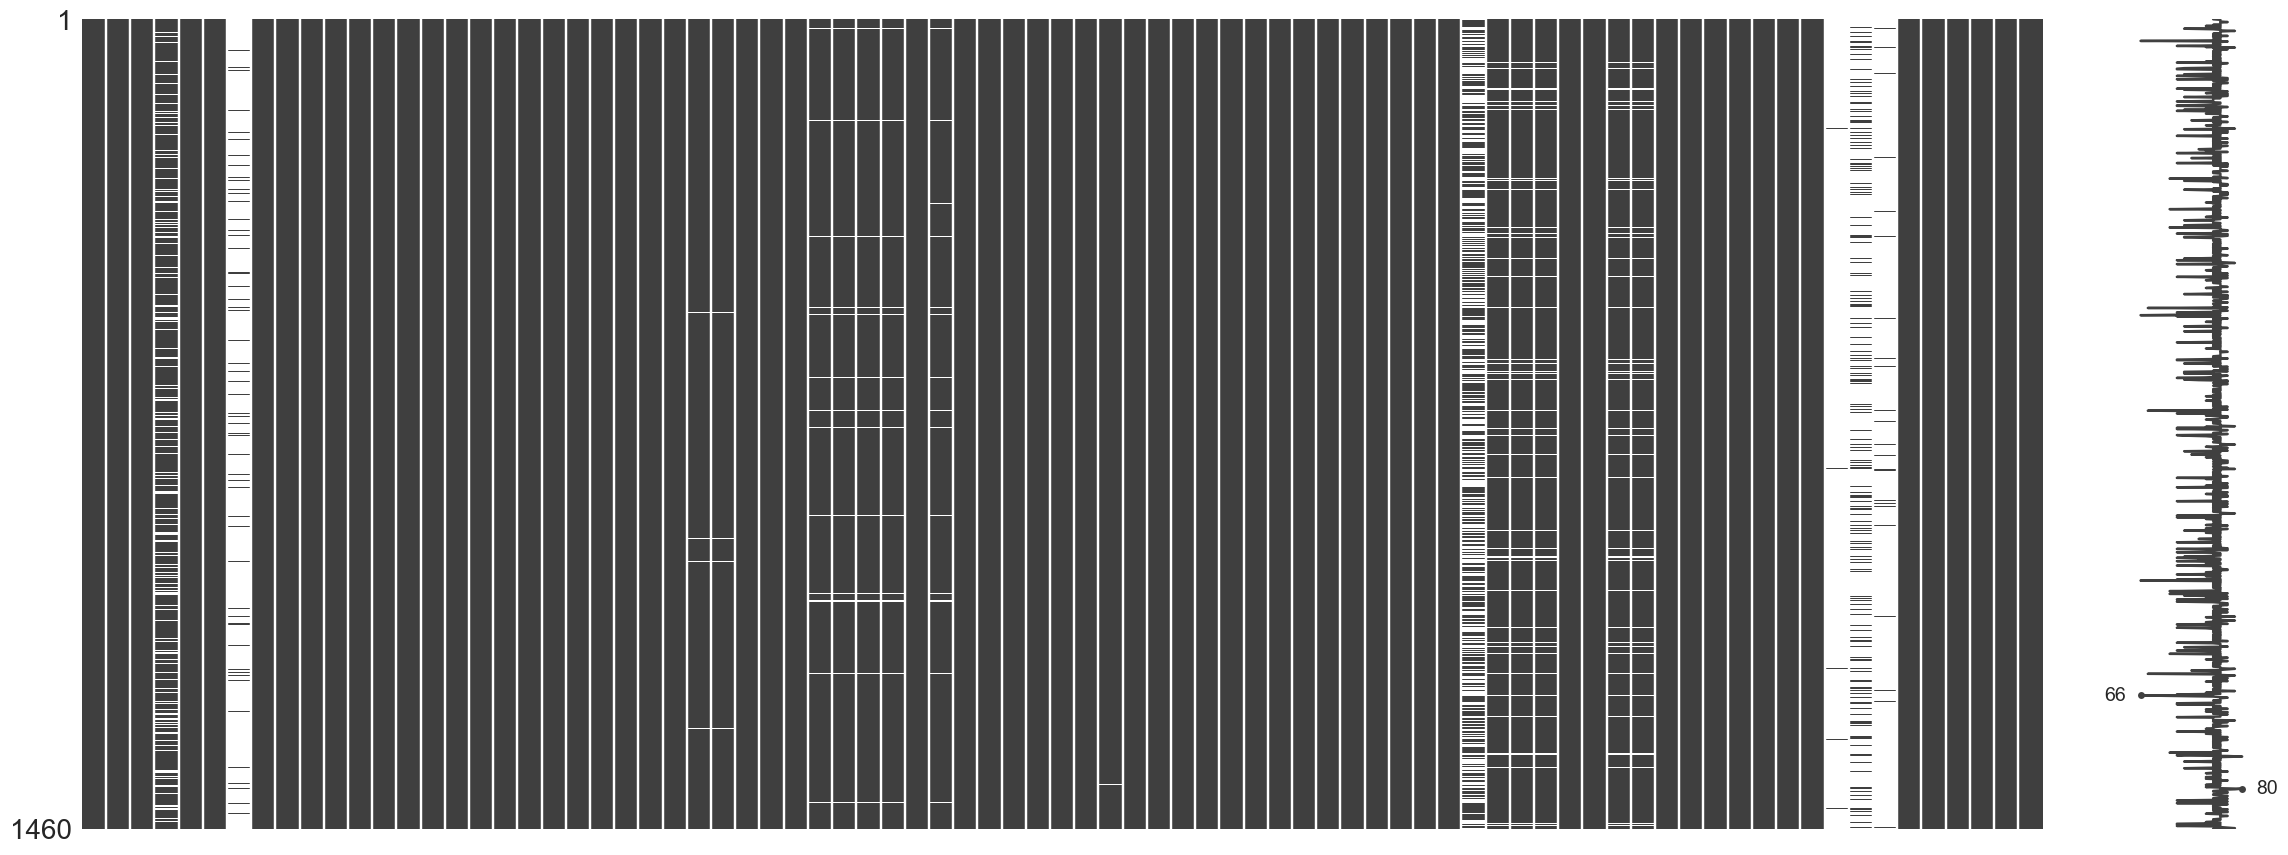

In [5]:
msno.matrix(df_Housing)

<Figure size 800x400 with 0 Axes>

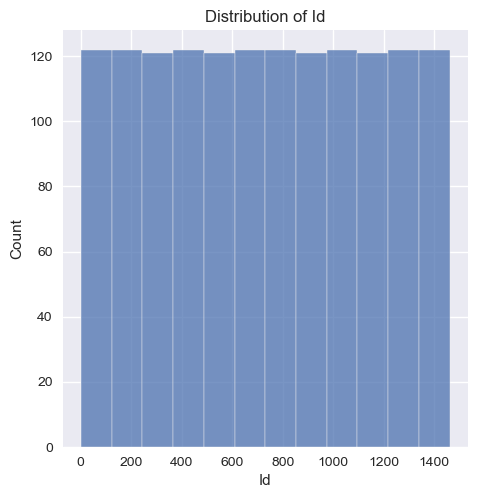

<Figure size 800x400 with 0 Axes>

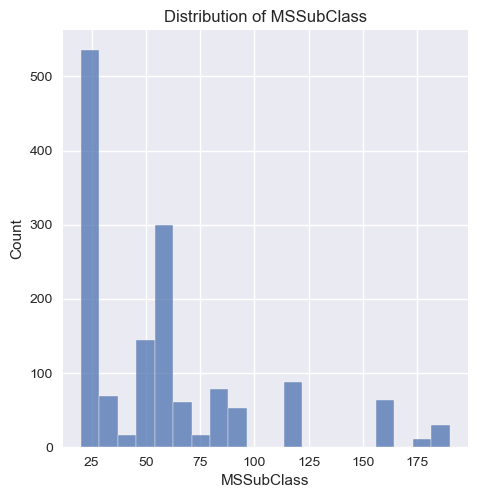

<Figure size 800x400 with 0 Axes>

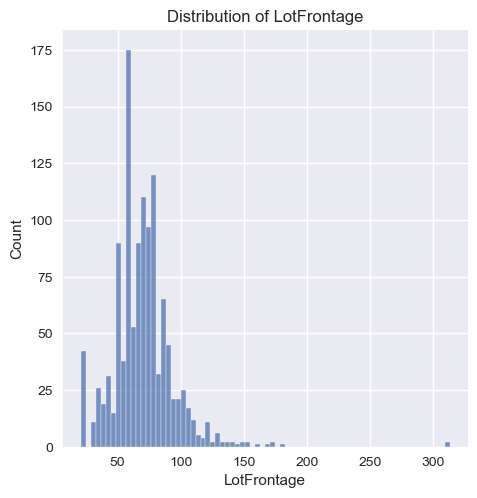

<Figure size 800x400 with 0 Axes>

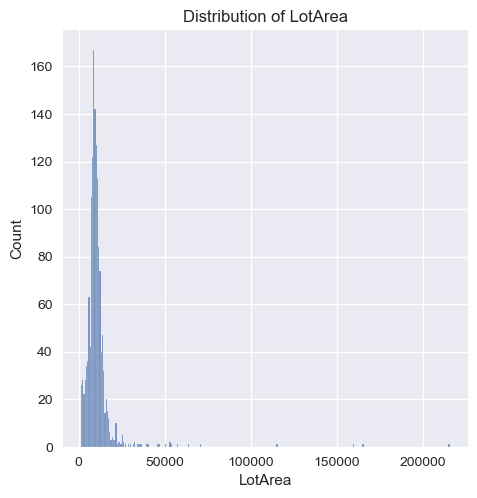

<Figure size 800x400 with 0 Axes>

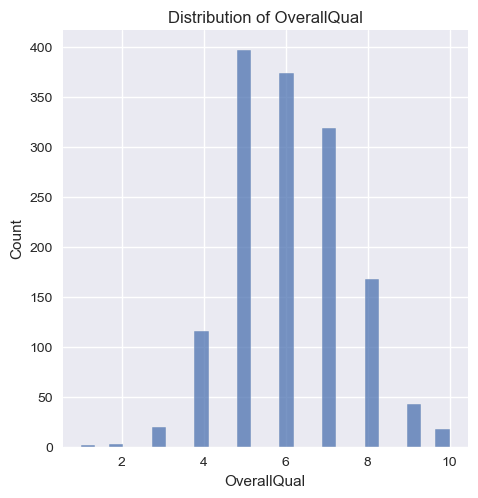

<Figure size 800x400 with 0 Axes>

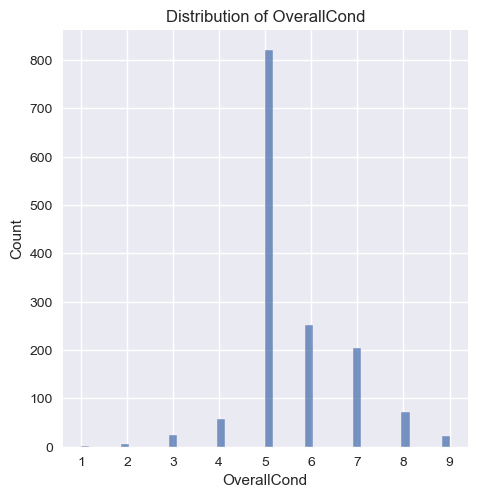

<Figure size 800x400 with 0 Axes>

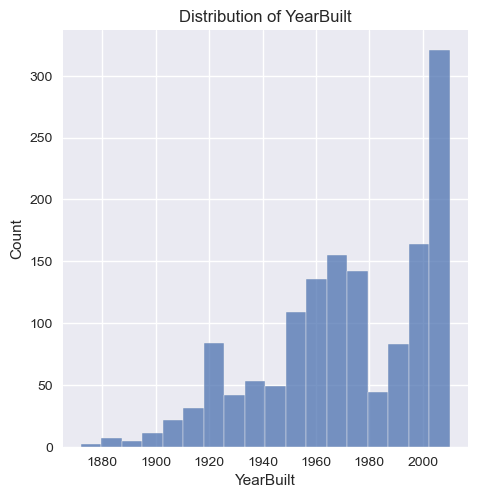

<Figure size 800x400 with 0 Axes>

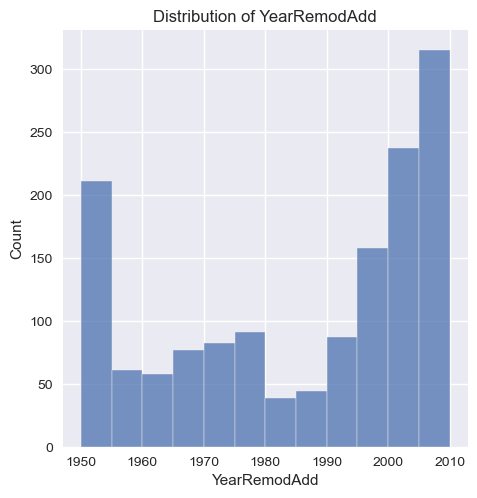

<Figure size 800x400 with 0 Axes>

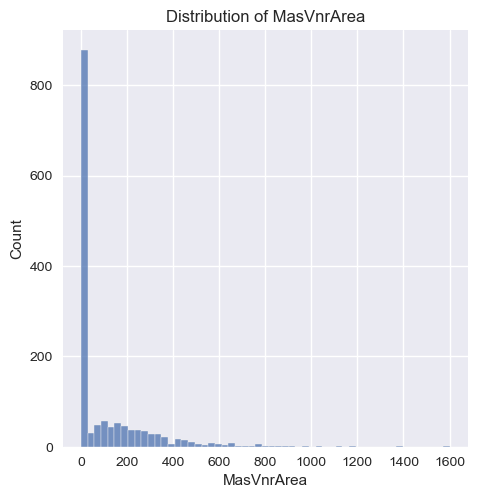

<Figure size 800x400 with 0 Axes>

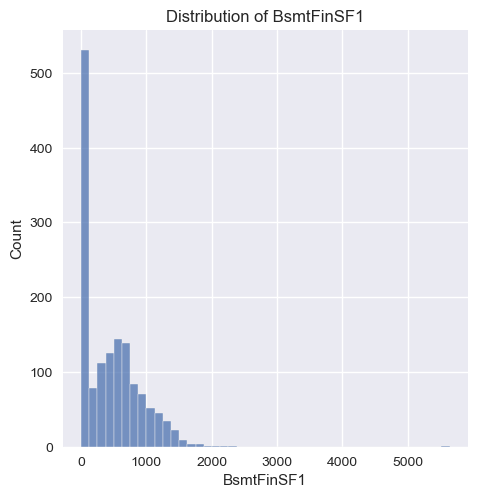

<Figure size 800x400 with 0 Axes>

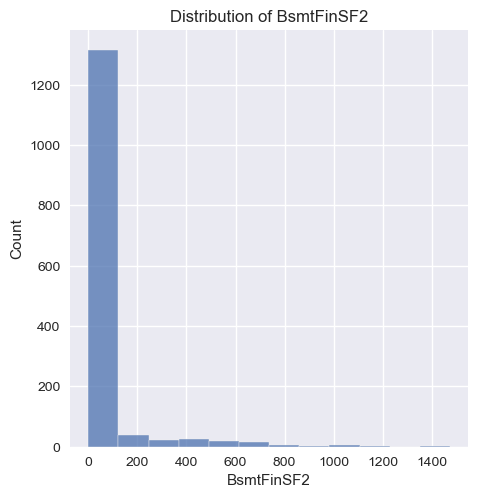

<Figure size 800x400 with 0 Axes>

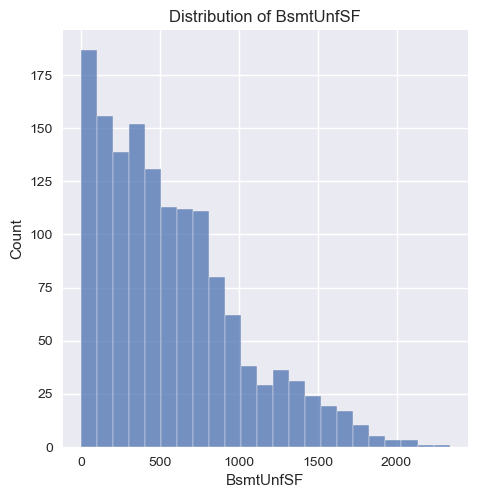

<Figure size 800x400 with 0 Axes>

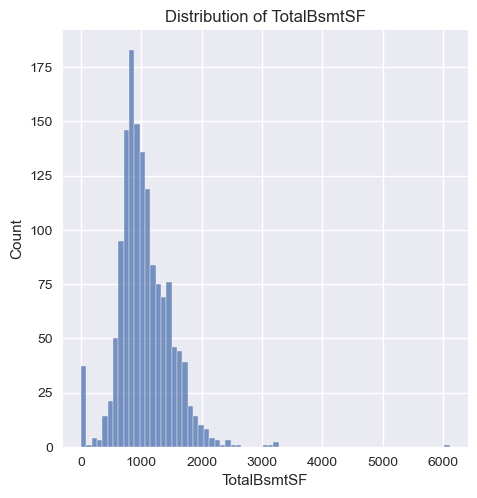

<Figure size 800x400 with 0 Axes>

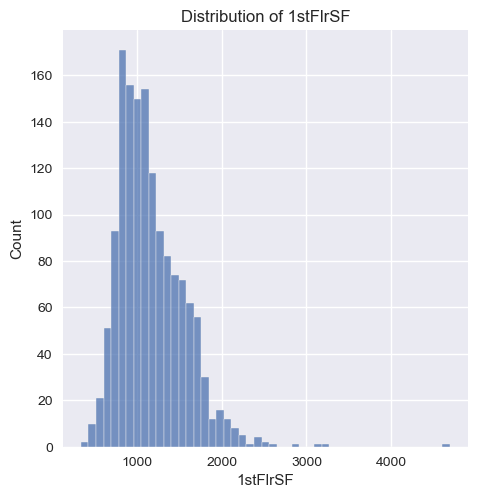

<Figure size 800x400 with 0 Axes>

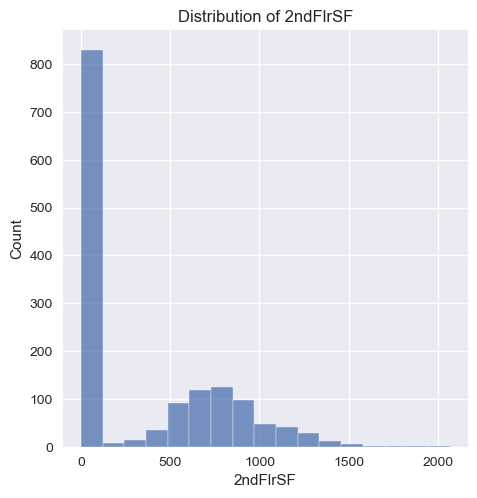

<Figure size 800x400 with 0 Axes>

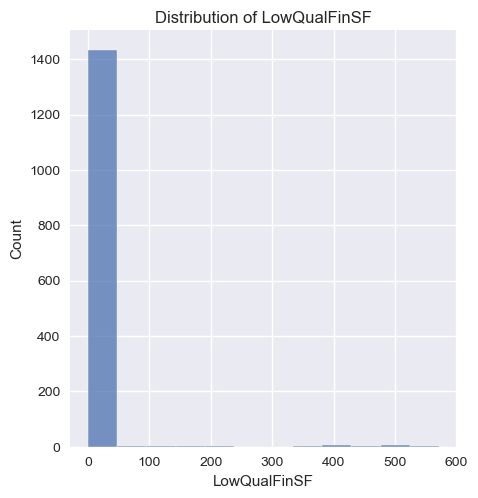

<Figure size 800x400 with 0 Axes>

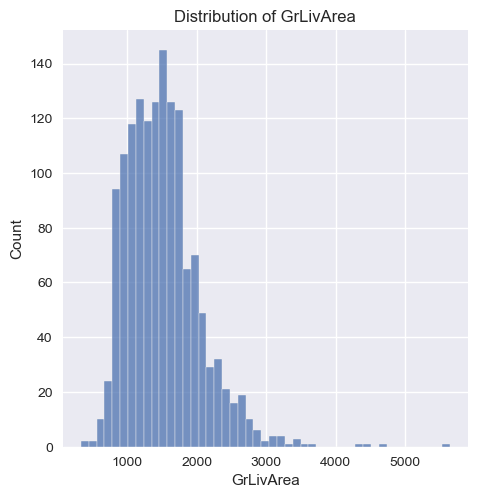

<Figure size 800x400 with 0 Axes>

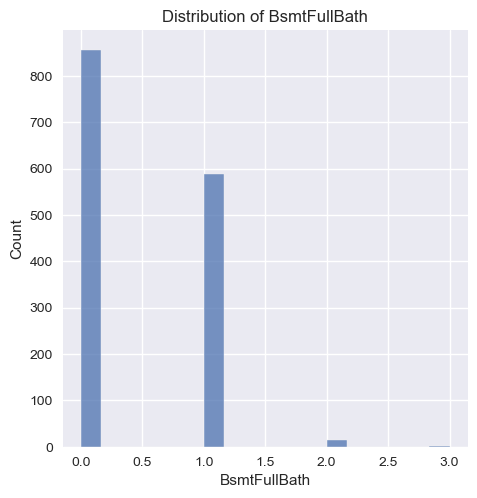

<Figure size 800x400 with 0 Axes>

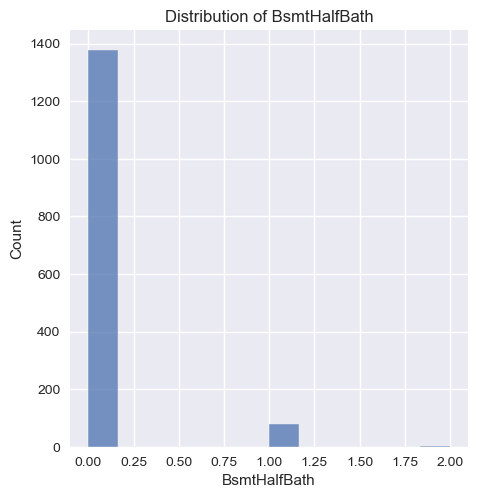

<Figure size 800x400 with 0 Axes>

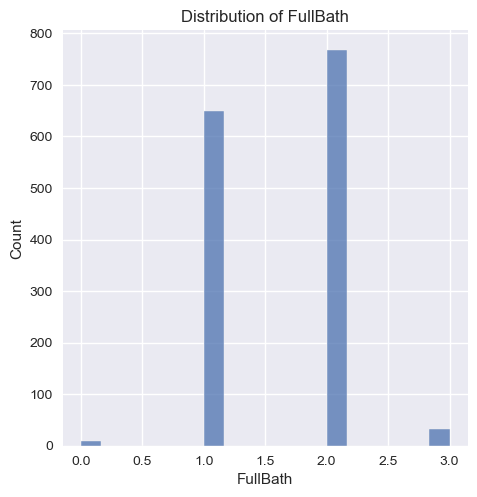

<Figure size 800x400 with 0 Axes>

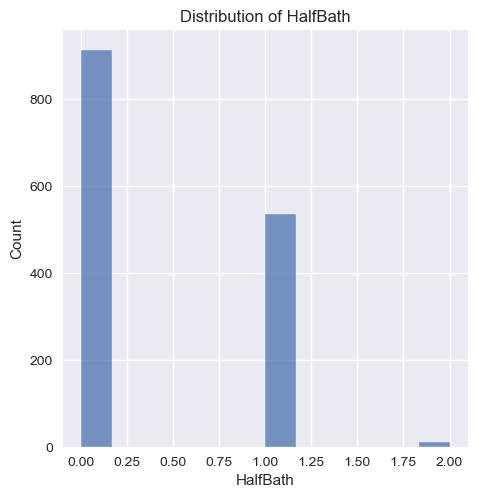

<Figure size 800x400 with 0 Axes>

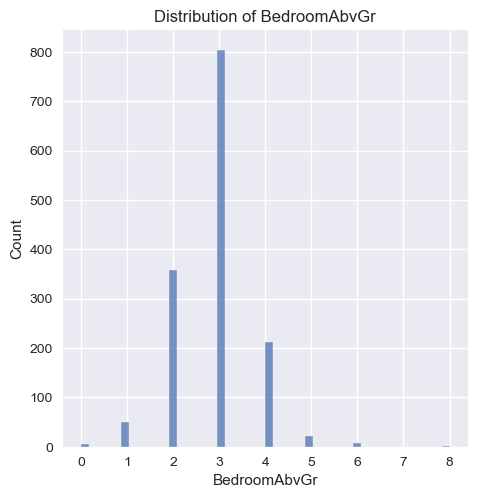

<Figure size 800x400 with 0 Axes>

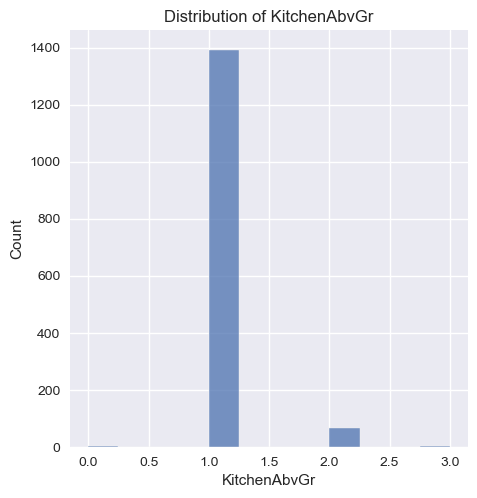

<Figure size 800x400 with 0 Axes>

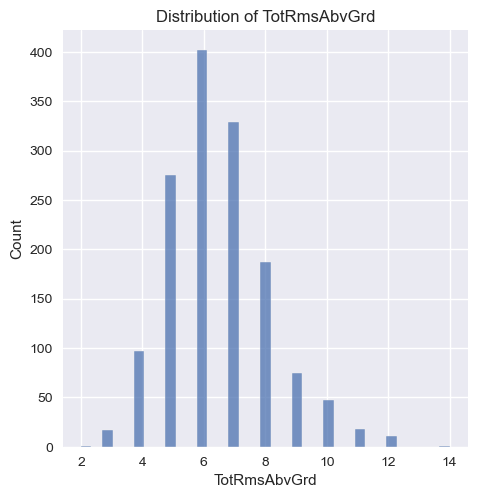

<Figure size 800x400 with 0 Axes>

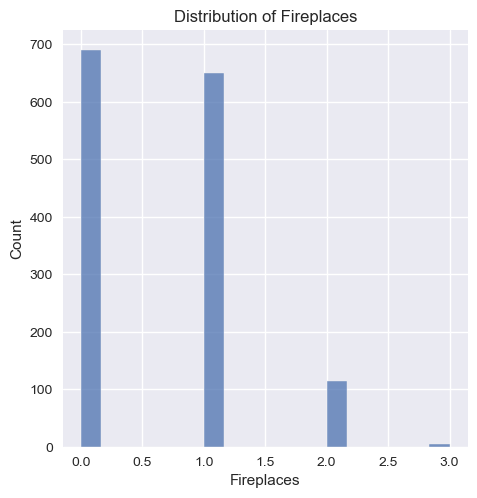

<Figure size 800x400 with 0 Axes>

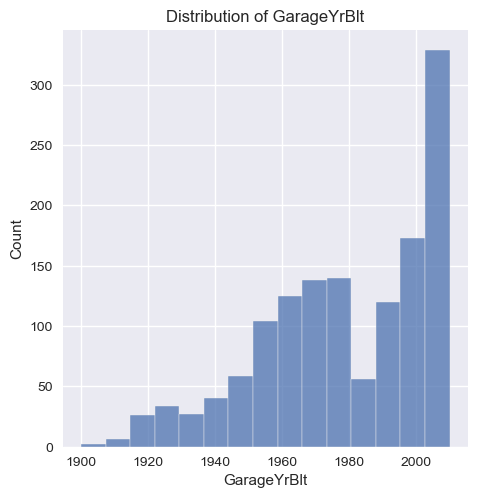

<Figure size 800x400 with 0 Axes>

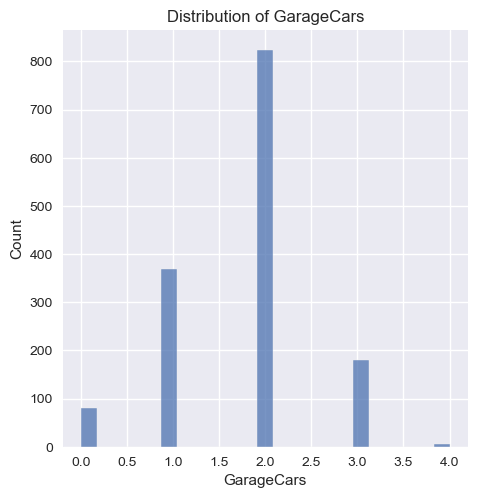

<Figure size 800x400 with 0 Axes>

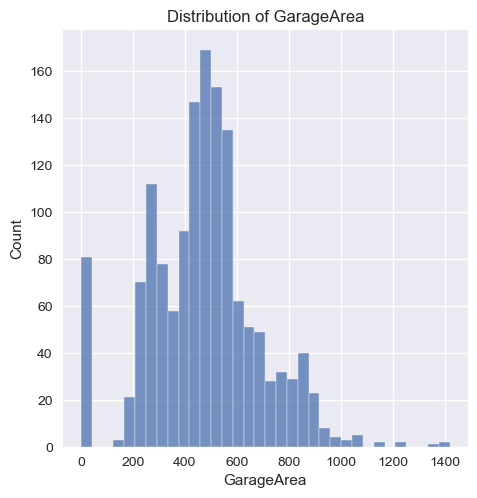

<Figure size 800x400 with 0 Axes>

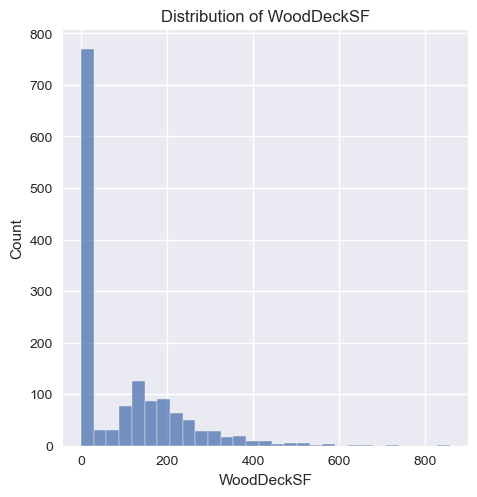

<Figure size 800x400 with 0 Axes>

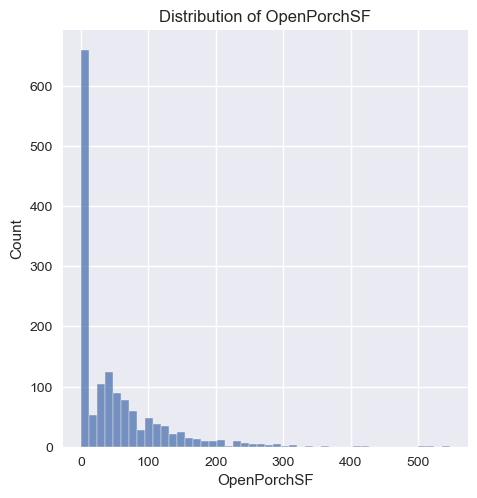

<Figure size 800x400 with 0 Axes>

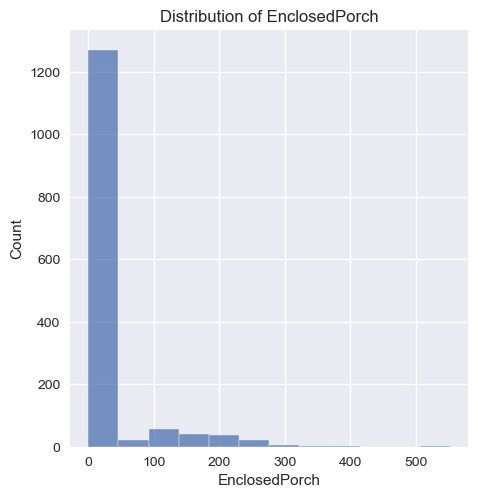

<Figure size 800x400 with 0 Axes>

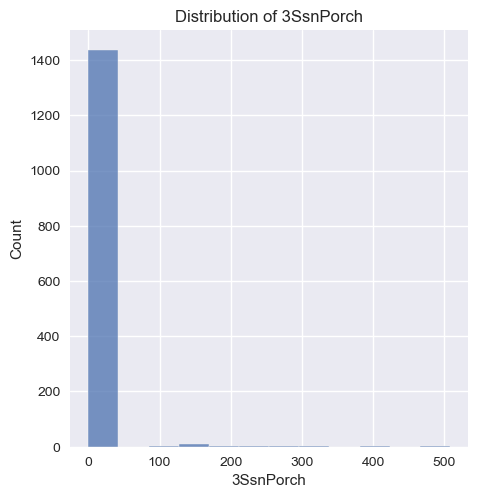

<Figure size 800x400 with 0 Axes>

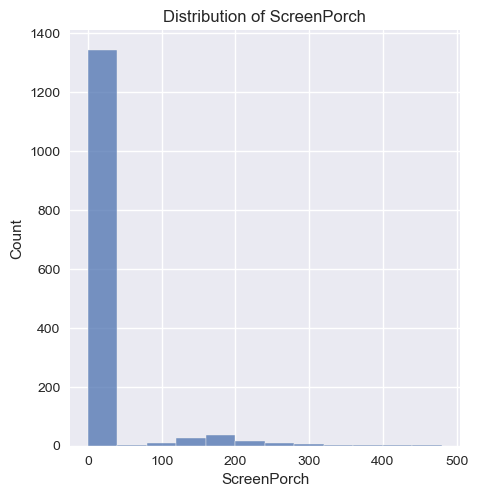

<Figure size 800x400 with 0 Axes>

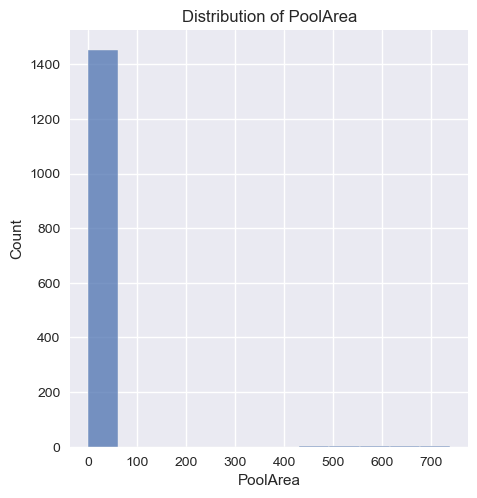

<Figure size 800x400 with 0 Axes>

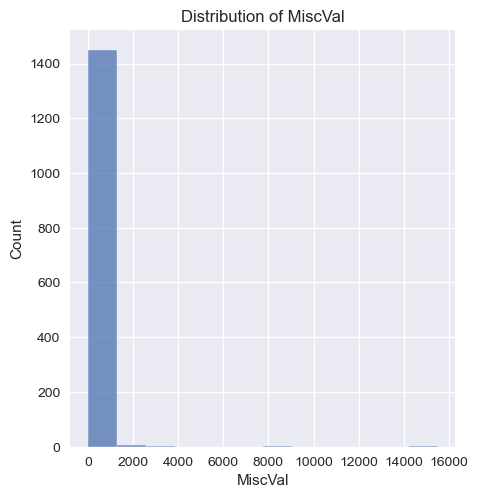

<Figure size 800x400 with 0 Axes>

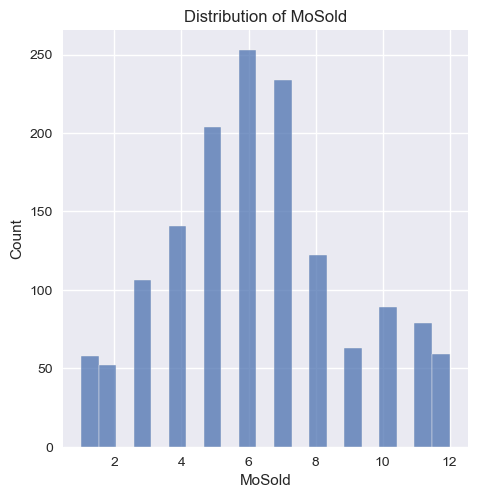

<Figure size 800x400 with 0 Axes>

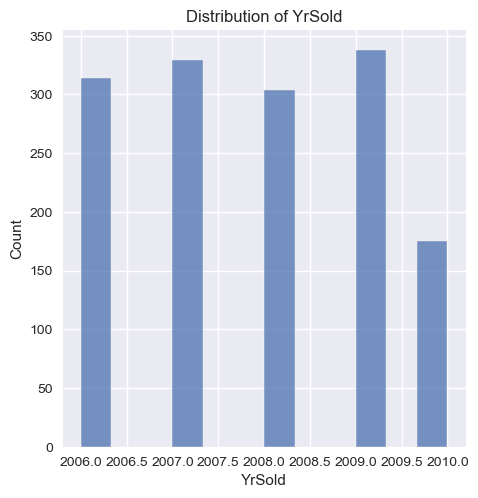

<Figure size 800x400 with 0 Axes>

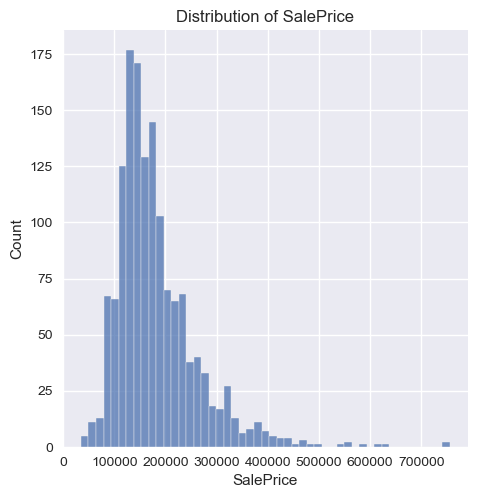

In [6]:
for col in df_Housing: #creates a loop for each column in a data to be ran
    if df_Housing[col].dtype == 'int64' or df_Housing[col].dtype == 'float64': 
        plt.figure(figsize=(8, 4))
        sns.displot(df_Housing[col])
        plt.title(f'Distribution of {col}')
        plt.show()

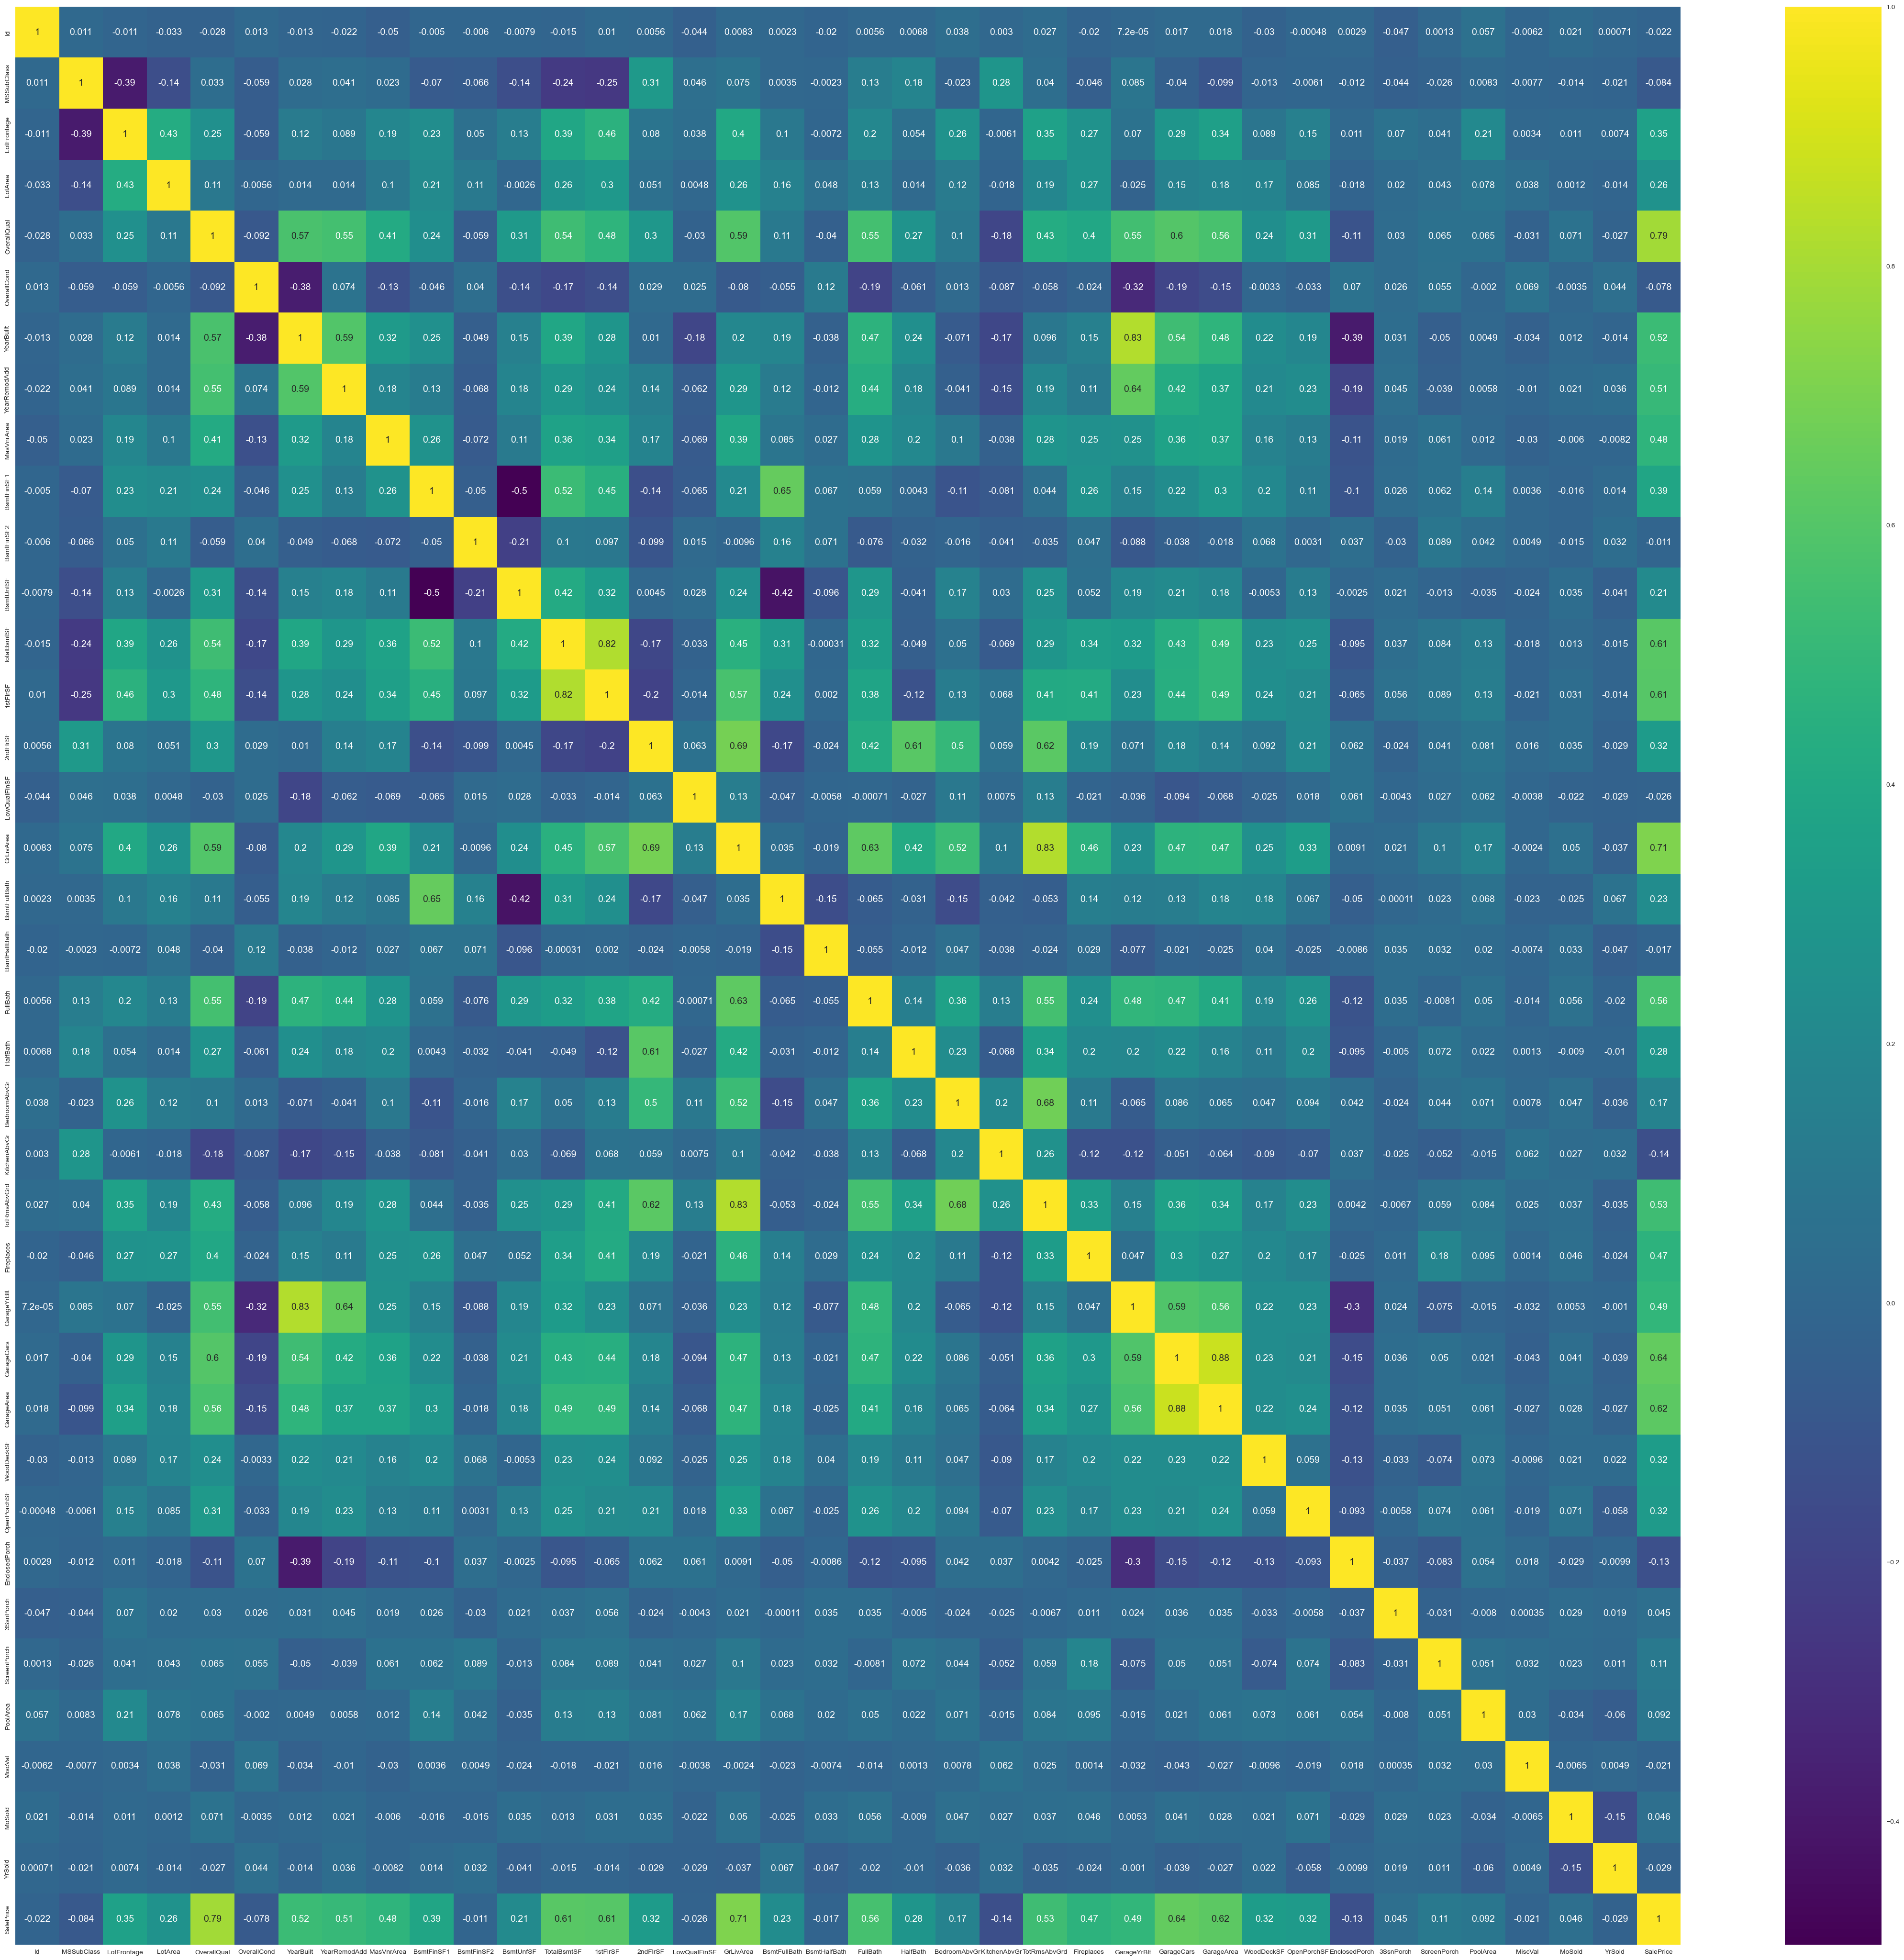

In [7]:
fig = plt.figure(figsize = (50,50))
sns.heatmap(df_Housing.corr(), cmap="viridis", annot=True)
plt.show()

In [8]:
correlation_matrix = df_Housing.corr()
for row in correlation_matrix:
    for col in correlation_matrix:
        if row == "SalePrice":
            if abs(correlation_matrix.loc[row,col]) > .5:
                print(f"Correlation between '{row}' and '{col}': {correlation_matrix.loc[row, col]}")

Correlation between 'SalePrice' and 'OverallQual': 0.7909816005838053
Correlation between 'SalePrice' and 'YearBuilt': 0.5228973328794967
Correlation between 'SalePrice' and 'YearRemodAdd': 0.5071009671113866
Correlation between 'SalePrice' and 'TotalBsmtSF': 0.6135805515591943
Correlation between 'SalePrice' and '1stFlrSF': 0.6058521846919153
Correlation between 'SalePrice' and 'GrLivArea': 0.7086244776126515
Correlation between 'SalePrice' and 'FullBath': 0.5606637627484453
Correlation between 'SalePrice' and 'TotRmsAbvGrd': 0.5337231555820284
Correlation between 'SalePrice' and 'GarageCars': 0.6404091972583519
Correlation between 'SalePrice' and 'GarageArea': 0.6234314389183622
Correlation between 'SalePrice' and 'SalePrice': 1.0


In [9]:
#create a list of categorical variables so we can run anova
categorical_variables = []

for col in df_Housing.columns:
    if df_Housing[col].dtype == "object":
        categorical_variables.append(col)
print(categorical_variables)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [10]:
#run the categorical variable through a for loop to see which have the loswest pvalues
for var in categorical_variables:
    
    grouped_data = df_Housing.groupby(var)['SalePrice']
    f_statistic, p_value = stats.f_oneway(*[group for _, group in grouped_data])
    
    # Print results
    print(f"ANOVA for {var}:")
    print(f"F-Statistic: {f_statistic}")
    print(f"P-Value: {p_value}")
    print('\n')

ANOVA for MSZoning:
F-Statistic: 43.84028167245718
P-Value: 8.817633866272648e-35


ANOVA for Street:
F-Statistic: 2.4592895583691994
P-Value: 0.11704860406782483


ANOVA for Alley:
F-Statistic: 35.56206043131903
P-Value: 4.899826166771113e-08


ANOVA for LotShape:
F-Statistic: 40.132851662262944
P-Value: 6.447523852011766e-25


ANOVA for LandContour:
F-Statistic: 12.850188333283924
P-Value: 2.7422167521379096e-08


ANOVA for Utilities:
F-Statistic: 0.29880407484898486
P-Value: 0.5847167739689381


ANOVA for LotConfig:
F-Statistic: 7.80995412346779
P-Value: 3.163167473604189e-06


ANOVA for LandSlope:
F-Statistic: 1.9588170374149438
P-Value: 0.1413963584114019


ANOVA for Neighborhood:
F-Statistic: 71.78486512058278
P-Value: 1.5586002827707996e-225


ANOVA for Condition1:
F-Statistic: 6.118017137125926
P-Value: 8.904549416138853e-08


ANOVA for Condition2:
F-Statistic: 2.0738986215227877
P-Value: 0.043425658360948464


ANOVA for BldgType:
F-Statistic: 13.01107716962085
P-Value: 2.05673

In [11]:
categorical_columns = []

for column in df_Housing.columns:
    if df_Housing[column].dtype == 'object':
        categorical_columns.append(column)

# Convert categorical columns to dummy variables
data_dummies = pd.get_dummies(df_Housing, columns=categorical_columns, drop_first=True)

# Define your target variable (response variable)
response_variable = 'SalePrice'

# Select only the dummy variables (exclude numerical columns)
dummy_variables = data_dummies.select_dtypes(include='uint8')  # Assumes dummy variables are of type uint8

# Calculate the correlation between each dummy variable and the target variable
correlations = dummy_variables.corrwith(data_dummies[response_variable])

# Sort correlations by absolute value in descending order
sorted_correlations = correlations.abs().sort_values(ascending=False)

# Print the top three correlations
top_three_correlations = sorted_correlations.head(3)
print(top_three_correlations)


ExterQual_TA        0.589044
KitchenQual_TA      0.519298
Foundation_PConc    0.497734
dtype: float64


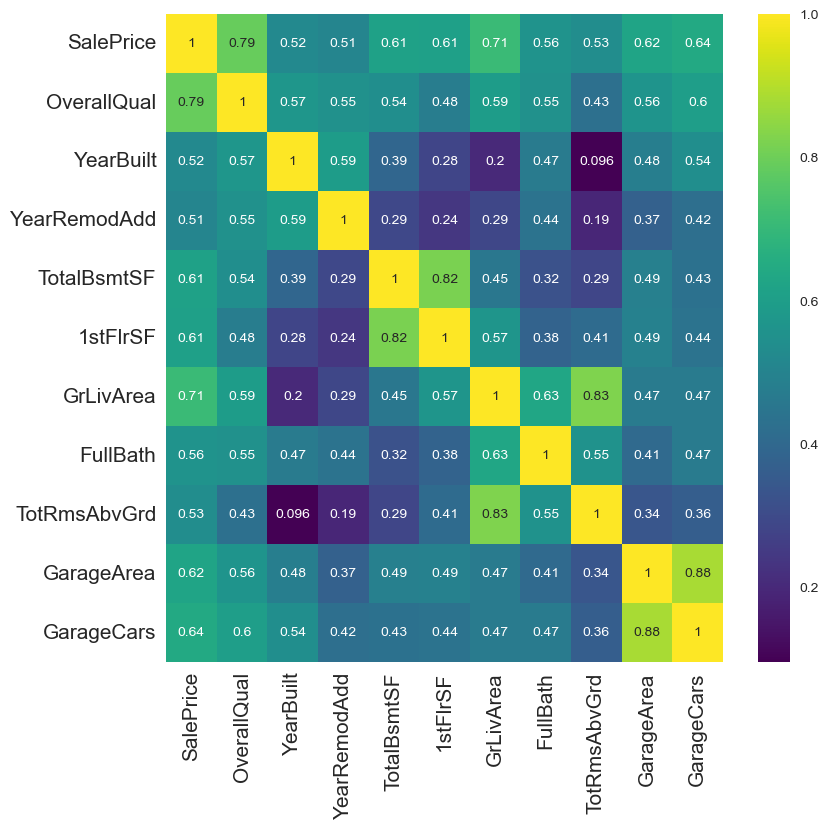

In [14]:
fig = plt.figure(figsize=(8, 8))  
selected_factors = ['SalePrice','OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageArea', 'GarageCars']
# Create the heatmap with custom font sizes for annotations and axis labels
heatmap = sns.heatmap(df_Housing[selected_factors].corr(), cmap="viridis", annot=True, annot_kws={"size": 10})

# Increase the font size for the axis labels (factors) on the outside axes
ax = plt.gca()
ax.xaxis.set_tick_params(labelsize=15)  # Adjust the labelsize as needed
ax.yaxis.set_tick_params(labelsize=15)  # Adjust the labelsize as needed

# Show the plot
plt.show()

In [15]:
df_numerical = df_Housing[['SalePrice','OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageArea', 'GarageCars']]
print(df_numerical.head())

   SalePrice  OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  \
0     208500            7       2003          2003          856       856   
1     181500            6       1976          1976         1262      1262   
2     223500            7       2001          2002          920       920   
3     140000            7       1915          1970          756       961   
4     250000            8       2000          2000         1145      1145   

   GrLivArea  FullBath  TotRmsAbvGrd  GarageArea  GarageCars  
0       1710         2             8         548           2  
1       1262         2             6         460           2  
2       1786         2             6         608           2  
3       1717         1             7         642           3  
4       2198         2             9         836           3  


In [16]:
categorical_columns = ['Condition2','Heating','Functional','Fence']
df_categorical = pd.get_dummies(df_Housing[categorical_columns], drop_first = True)
 
df_MLR = pd.concat([df_numerical, df_categorical], axis = 1)
df_MLR.drop('SalePrice', axis=1, inplace=True)
print(df_MLR.head())

   OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  GrLivArea  \
0            7       2003          2003          856       856       1710   
1            6       1976          1976         1262      1262       1262   
2            7       2001          2002          920       920       1786   
3            7       1915          1970          756       961       1717   
4            8       2000          2000         1145      1145       2198   

   FullBath  TotRmsAbvGrd  GarageArea  GarageCars  Condition2_Feedr  \
0         2             8         548           2                 0   
1         2             6         460           2                 0   
2         2             6         608           2                 0   
3         1             7         642           3                 0   
4         2             9         836           3                 0   

   Condition2_Norm  Condition2_PosA  Condition2_PosN  Condition2_RRAe  \
0                1                0  

<Axes: >

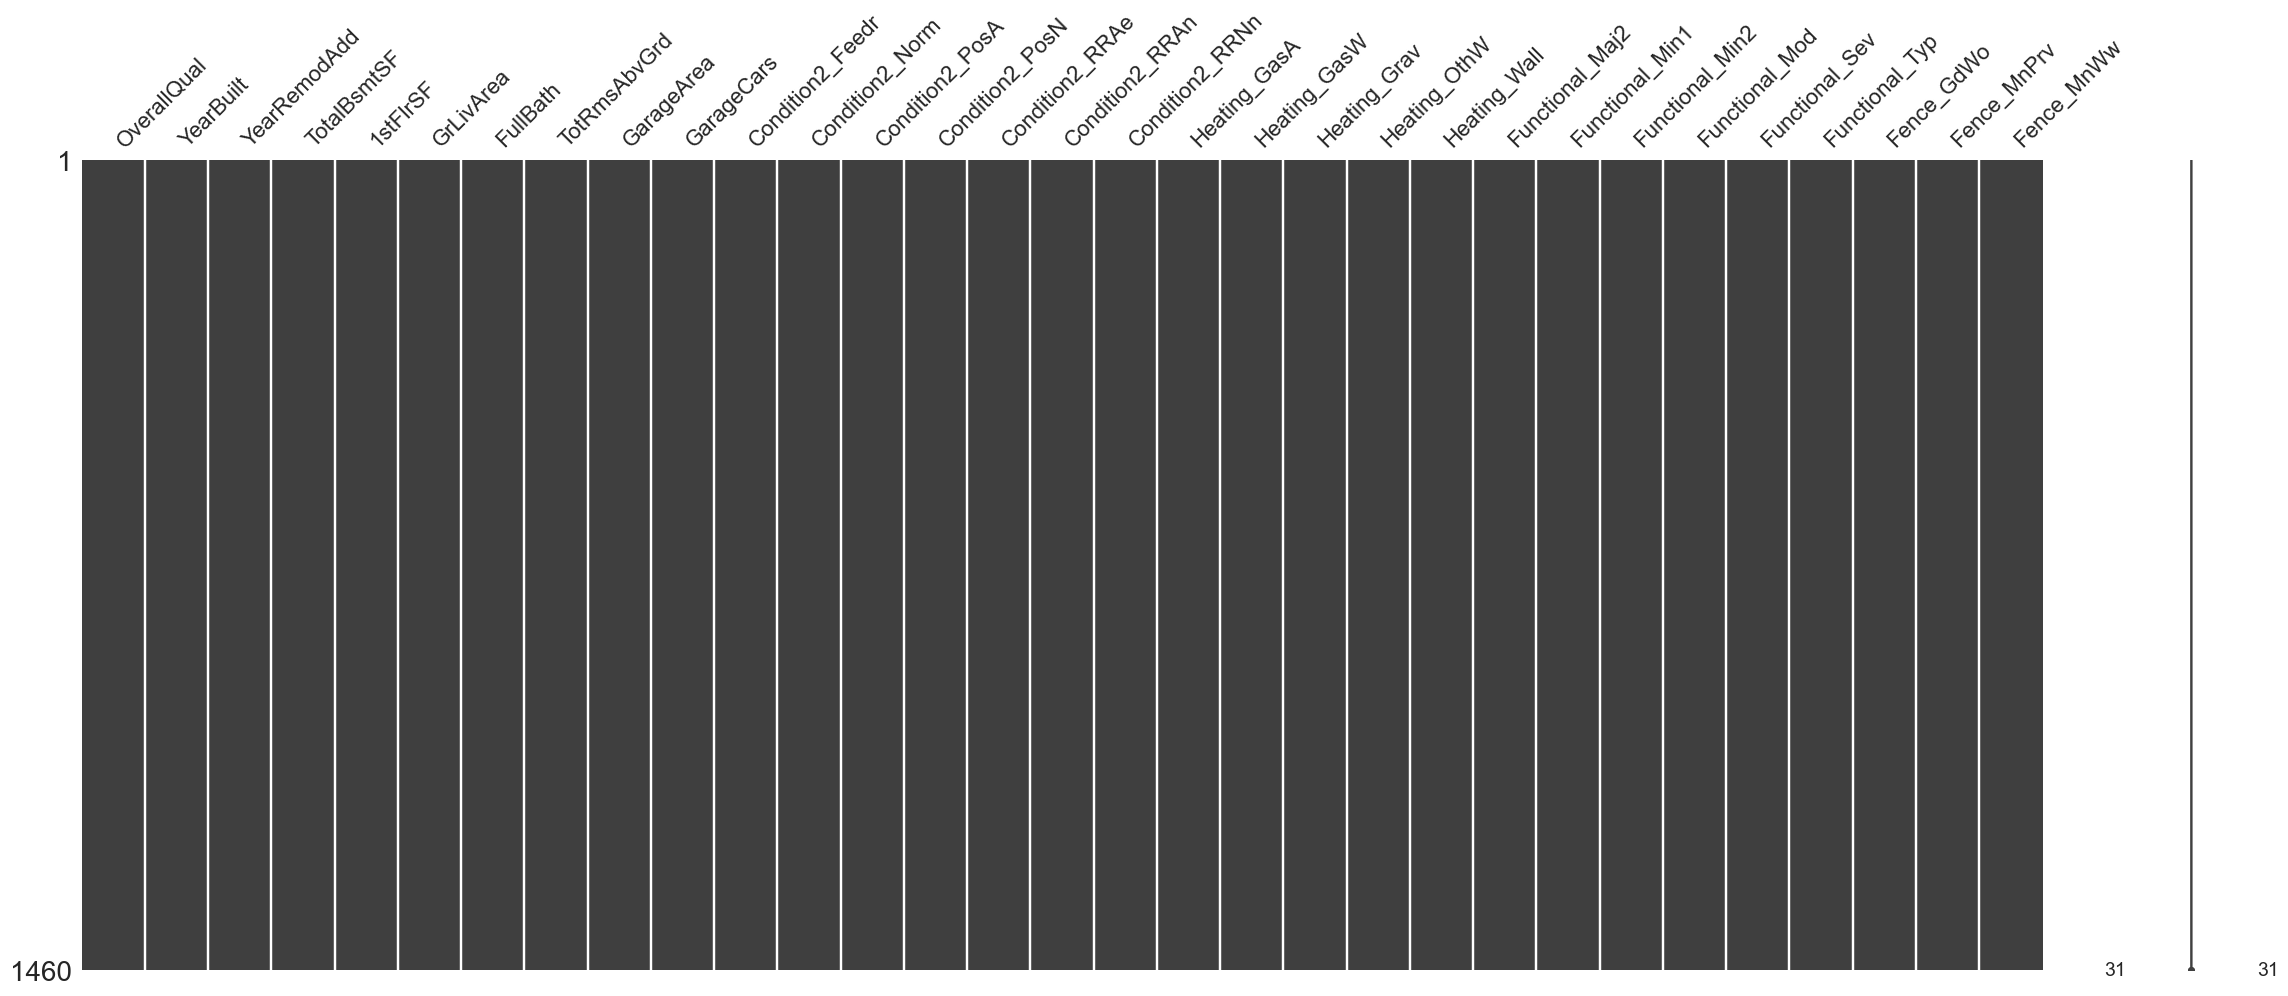

In [17]:
msno.matrix(df_MLR)

In [18]:
df_MLR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   OverallQual       1460 non-null   int64
 1   YearBuilt         1460 non-null   int64
 2   YearRemodAdd      1460 non-null   int64
 3   TotalBsmtSF       1460 non-null   int64
 4   1stFlrSF          1460 non-null   int64
 5   GrLivArea         1460 non-null   int64
 6   FullBath          1460 non-null   int64
 7   TotRmsAbvGrd      1460 non-null   int64
 8   GarageArea        1460 non-null   int64
 9   GarageCars        1460 non-null   int64
 10  Condition2_Feedr  1460 non-null   uint8
 11  Condition2_Norm   1460 non-null   uint8
 12  Condition2_PosA   1460 non-null   uint8
 13  Condition2_PosN   1460 non-null   uint8
 14  Condition2_RRAe   1460 non-null   uint8
 15  Condition2_RRAn   1460 non-null   uint8
 16  Condition2_RRNn   1460 non-null   uint8
 17  Heating_GasA      1460 non-null  

## First Run

In [19]:


target_variable = 'SalePrice'
y = df_Housing[target_variable]

X = df_MLR
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     127.8
Date:                Wed, 27 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:05:33   Log-Likelihood:                -13926.
No. Observations:                1168   AIC:                         2.792e+04
Df Residuals:                    1136   BIC:                         2.808e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.235e+06    1.5e+05  

## Second Run

In [20]:


#drop the variable
df_MLR = df_MLR.drop('Condition2_Norm', axis=1)

X = df_MLR
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     132.2
Date:                Wed, 27 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:05:34   Log-Likelihood:                -13926.
No. Observations:                1168   AIC:                         2.791e+04
Df Residuals:                    1137   BIC:                         2.807e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.237e+06   1.49e+05  

## Third Run

In [21]:


#drop variable
df_MLR = df_MLR.drop('Condition2_RRNn', axis=1)

X = df_MLR
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     136.8
Date:                Wed, 27 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:05:34   Log-Likelihood:                -13926.
No. Observations:                1168   AIC:                         2.791e+04
Df Residuals:                    1138   BIC:                         2.806e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.237e+06   1.48e+05  

## Fourth Run

In [22]:

#drop variable
df_MLR = df_MLR.drop('Functional_Maj2', axis=1)

X = df_MLR
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     141.8
Date:                Wed, 27 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:05:34   Log-Likelihood:                -13926.
No. Observations:                1168   AIC:                         2.791e+04
Df Residuals:                    1139   BIC:                         2.806e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.238e+06   1.48e+05  

## Fifth Run

In [23]:

#drop variable
df_MLR = df_MLR.drop('TotRmsAbvGrd', axis=1)

X = df_MLR
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     147.2
Date:                Wed, 27 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:05:35   Log-Likelihood:                -13926.
No. Observations:                1168   AIC:                         2.791e+04
Df Residuals:                    1140   BIC:                         2.805e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.244e+06   1.47e+05  

## Sixth Run

In [24]:
#drop variable
df_MLR = df_MLR.drop('Fence_MnWw', axis=1)

X = df_MLR
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     153.0
Date:                Wed, 27 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:05:35   Log-Likelihood:                -13926.
No. Observations:                1168   AIC:                         2.791e+04
Df Residuals:                    1141   BIC:                         2.804e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.244e+06   1.47e+05  

## Seventh Run

In [25]:
#drop variable
df_MLR = df_MLR.drop('Condition2_PosA', axis=1)

X = df_MLR
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     159.2
Date:                Wed, 27 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:05:35   Log-Likelihood:                -13926.
No. Observations:                1168   AIC:                         2.790e+04
Df Residuals:                    1142   BIC:                         2.804e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -1.24e+06   1.47e+05  

## Eighth Run

In [26]:
#drop variable
df_MLR = df_MLR.drop('Condition2_Feedr', axis=1)

X = df_MLR
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     165.8
Date:                Wed, 27 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:05:36   Log-Likelihood:                -13927.
No. Observations:                1168   AIC:                         2.790e+04
Df Residuals:                    1143   BIC:                         2.803e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -1.24e+06   1.47e+05     

## Nineth Run

In [27]:
#drop variable
df_MLR = df_MLR.drop('Heating_Wall', axis=1)

X = df_MLR
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     173.1
Date:                Wed, 27 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:05:36   Log-Likelihood:                -13927.
No. Observations:                1168   AIC:                         2.790e+04
Df Residuals:                    1144   BIC:                         2.802e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.255e+06   1.42e+05     

## Tenth Run

In [28]:
#drop variable
df_MLR = df_MLR.drop('Fence_MnPrv', axis=1)

X = df_MLR
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     181.1
Date:                Wed, 27 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:05:36   Log-Likelihood:                -13927.
No. Observations:                1168   AIC:                         2.790e+04
Df Residuals:                    1145   BIC:                         2.802e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -1.25e+06   1.42e+05     

## Eleventh Run

In [29]:
#drop variable
df_MLR = df_MLR.drop('Fence_GdWo', axis=1)

X = df_MLR
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     189.8
Date:                Wed, 27 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:05:37   Log-Likelihood:                -13927.
No. Observations:                1168   AIC:                         2.790e+04
Df Residuals:                    1146   BIC:                         2.801e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.249e+06   1.42e+05     

## Twelfth Run

In [30]:
#drop variable
df_MLR = df_MLR.drop('Heating_Grav', axis=1)

X = df_MLR
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     199.3
Date:                Wed, 27 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:05:37   Log-Likelihood:                -13928.
No. Observations:                1168   AIC:                         2.790e+04
Df Residuals:                    1147   BIC:                         2.800e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.263e+06   1.41e+05     

## Thirteenth Run

In [31]:
#drop variable
df_MLR = df_MLR.drop('Condition2_RRAe', axis=1)

X = df_MLR
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     209.7
Date:                Wed, 27 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:05:37   Log-Likelihood:                -13928.
No. Observations:                1168   AIC:                         2.790e+04
Df Residuals:                    1148   BIC:                         2.800e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -1.26e+06   1.41e+05     

## Fourteenth Run

In [32]:
#drop variable
df_MLR = df_MLR.drop('Heating_GasW', axis=1)

X = df_MLR
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     221.3
Date:                Wed, 27 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:05:38   Log-Likelihood:                -13928.
No. Observations:                1168   AIC:                         2.789e+04
Df Residuals:                    1149   BIC:                         2.799e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.269e+06    1.4e+05     

## Fifthteenth Run

In [33]:
#drop variable
df_MLR = df_MLR.drop('Heating_GasA', axis=1)

X = df_MLR
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     234.4
Date:                Wed, 27 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:05:38   Log-Likelihood:                -13929.
No. Observations:                1168   AIC:                         2.789e+04
Df Residuals:                    1150   BIC:                         2.798e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.254e+06   1.39e+05     

## Sixteenth Run

In [34]:
#drop variable
df_MLR = df_MLR.drop('Functional_Mod', axis=1)

X = df_MLR
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     248.8
Date:                Wed, 27 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:05:38   Log-Likelihood:                -13930.
No. Observations:                1168   AIC:                         2.789e+04
Df Residuals:                    1151   BIC:                         2.798e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.238e+06   1.39e+05     

## Seventeenth Run

In [35]:
df_MLR = df_MLR.drop('Functional_Min1', axis=1)

X = df_MLR
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     265.5
Date:                Wed, 27 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:05:39   Log-Likelihood:                -13930.
No. Observations:                1168   AIC:                         2.789e+04
Df Residuals:                    1152   BIC:                         2.797e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.235e+06   1.39e+05     

## Eighteenth Run

In [36]:
df_MLR = df_MLR.drop('Functional_Min2', axis=1)

X = df_MLR
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     284.6
Date:                Wed, 27 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:05:39   Log-Likelihood:                -13930.
No. Observations:                1168   AIC:                         2.789e+04
Df Residuals:                    1153   BIC:                         2.797e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.235e+06   1.39e+05     

## Nineteenth Run

In [37]:
df_MLR = df_MLR.drop('Condition2_RRAn', axis=1)

X = df_MLR
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     306.2
Date:                Wed, 27 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:05:39   Log-Likelihood:                -13931.
No. Observations:                1168   AIC:                         2.789e+04
Df Residuals:                    1154   BIC:                         2.796e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.236e+06   1.39e+05     

# Twentyith Run

In [38]:
df_MLR = df_MLR.drop('GarageArea', axis=1)

X = df_MLR
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     331.1
Date:                Wed, 27 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:05:40   Log-Likelihood:                -13932.
No. Observations:                1168   AIC:                         2.789e+04
Df Residuals:                    1155   BIC:                         2.796e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.239e+06   1.39e+05     

## VIF

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF values
print(vif)

           Variable           VIF
0             const  16818.081016
1       OverallQual      2.836409
2         YearBuilt      2.353488
3      YearRemodAdd      1.754083
4       TotalBsmtSF      3.643333
5          1stFlrSF      3.830861
6         GrLivArea      2.727734
7          FullBath      2.154344
8        GarageCars      1.873437
9   Condition2_PosN      1.027280
10     Heating_OthW      1.021524
11   Functional_Sev      1.011428
12   Functional_Typ      1.139749


## Get wanted values of my model ran against test data

In [42]:
# Make predictions on the test data
X_test = sm.add_constant(X_test)
y_pred = model.predict(X_test)

# Calculate evaluation metrics for the testing data
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
p_values = model.pvalues

print("P_Values:")
print(p_values)
print('\n')
print(f"Mean Squared Error (MSE) on Test Data: {mse}")
print(f"Root Mean Squared Error (RMSE) on Test Data: {rmse}")
print(f"R-squared (R2) on Test Data: {r2}")

P_Values:
const              1.644074e-18
OverallQual        1.431133e-45
YearBuilt          8.772330e-07
YearRemodAdd       3.838977e-06
TotalBsmtSF        8.049806e-03
1stFlrSF           3.111260e-04
GrLivArea          2.085902e-49
FullBath           5.359694e-03
GarageCars         3.089566e-12
Condition2_PosN    5.083300e-08
Heating_OthW       1.162545e-02
Functional_Sev     2.549259e-02
Functional_Typ     8.012089e-04
dtype: float64


Mean Squared Error (MSE) on Test Data: 1521032628.0809288
Root Mean Squared Error (RMSE) on Test Data: 39000.41830648652
R-squared (R2) on Test Data: 0.8016990950586019


## Check the error plots (needs to be redone)

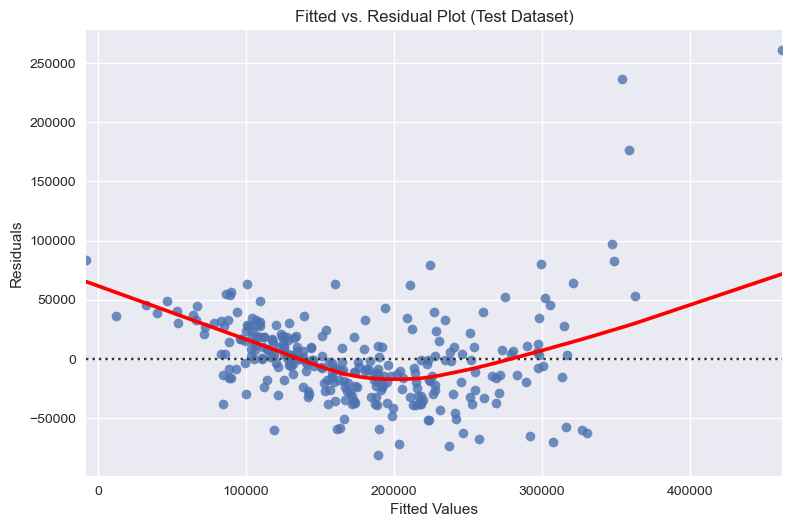

In [48]:
#Fitted vs. Residual Plot

y_pred_test = model.predict(X_test)

# Calculate residuals for the test dataset
residuals_test = y_test - y_pred_test

# Create the Fitted vs. Residual Plot for the test dataset
sns.residplot(x=y_pred_test, y=residuals_test, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Fitted vs. Residual Plot (Test Dataset)')
plt.show()

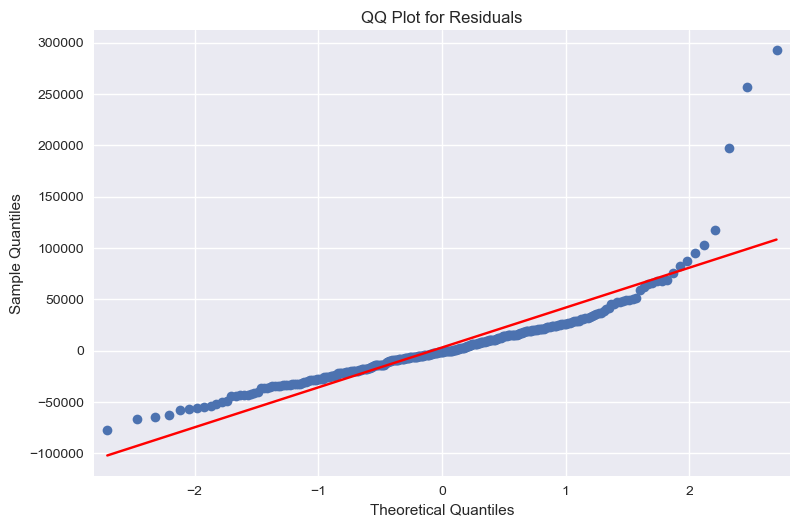

In [49]:
y_pred_test = model.predict(X_test)

# Calculate residuals for the test dataset
residuals_test = y_test - y_pred_test


sm.qqplot(residuals_test, line='s')  
plt.title('QQ Plot for Residuals')
plt.show()

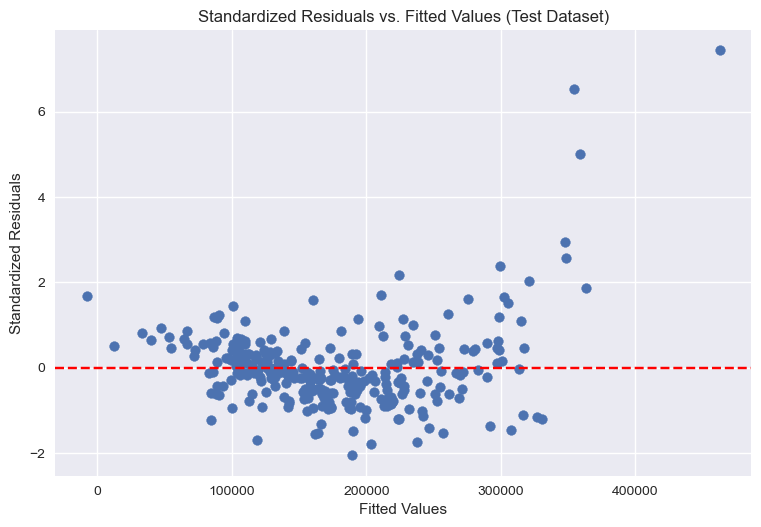

In [50]:
# Calculate residuals for the test dataset
residuals_test = y_test - y_pred_test

# Calculate fitted values for the test dataset
fitted_values_test = y_pred_test

# Calculate standardized residuals for the test dataset
std_residuals_test = (residuals_test - residuals_test.mean()) / residuals_test.std()

# Create the Standardized Residuals vs. Fitted Values plot for the test dataset
plt.scatter(fitted_values_test, std_residuals_test)
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
plt.title('Standardized Residuals vs. Fitted Values (Test Dataset)')
plt.axhline(0, color='red', linestyle='--')
plt.show()

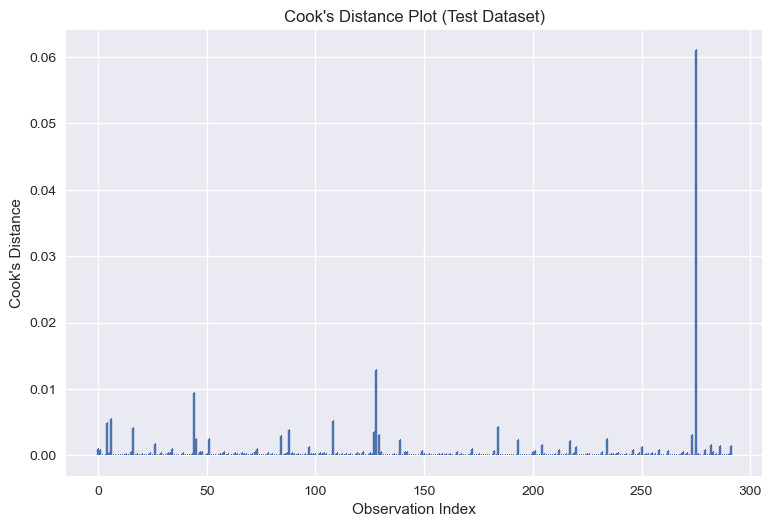

In [52]:
influence = model.get_influence()
cook_d2, pvals = influence.cooks_distance

# Calculate Cook's Distance for the test dataset
cook_d2_test = cook_d2[-len(X_test):]  # Select the last len(X_test) values

# Create a Cook's Distance plot for the test dataset
plt.stem(np.arange(len(cook_d2_test)), cook_d2_test, markerfmt=",", basefmt=" ", use_line_collection=True)
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance Plot (Test Dataset)")
plt.show()

## Which neighborhood

In [113]:
df_neighborhood = df_Housing[['SalePrice','Neighborhood']]

In [114]:
print(df_neighborhood.head())

   SalePrice Neighborhood
0     208500      CollgCr
1     181500      Veenker
2     223500      CollgCr
3     140000      Crawfor
4     250000      NoRidge


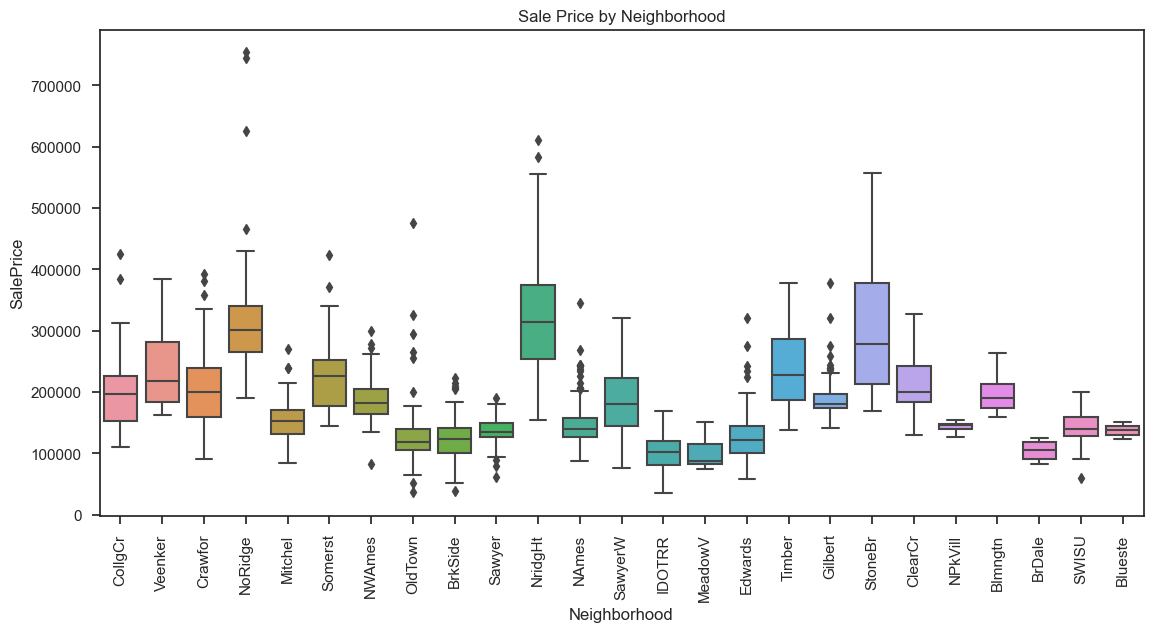

In [117]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df_neighborhood)
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('SalePrice')
plt.title('Sale Price by Neighborhood')
plt.show()

In [121]:
neighborhood_stats = df_neighborhood.groupby('Neighborhood')['SalePrice'].agg(['mean', 'median', 'min', 'max']).reset_index()
neighborhood_stats = neighborhood_stats.sort_values(by='mean', ascending=False)
print(neighborhood_stats)

   Neighborhood           mean    median     min     max
15      NoRidge  335295.317073  301500.0  190000  755000
16      NridgHt  316270.623377  315000.0  154000  611657
22      StoneBr  310499.000000  278000.0  170000  556581
23       Timber  242247.447368  228475.0  137500  378500
24      Veenker  238772.727273  218000.0  162500  385000
21      Somerst  225379.837209  225500.0  144152  423000
4       ClearCr  212565.428571  200250.0  130000  328000
6       Crawfor  210624.725490  200624.0   90350  392500
5       CollgCr  197965.773333  197200.0  110000  424870
0       Blmngtn  194870.882353  191000.0  159895  264561
8       Gilbert  192854.506329  181000.0  141000  377500
14       NWAmes  189050.068493  182900.0   82500  299800
20      SawyerW  186555.796610  179900.0   76000  320000
11      Mitchel  156270.122449  153500.0   84500  271000
12        NAmes  145847.080000  140000.0   87500  345000
13      NPkVill  142694.444444  146000.0  127500  155000
18        SWISU  142591.360000 